enter a start date format YYYY-MM-DD  2016-2-1
enter a end date format YYYY-MM-DD  2017-2-1
moving average is  50 days
stock AMZN
            s_adjclose  moving_avg  l/s_signal buy_or_sell  buy_or_sell2  \
Date                                                                       
2015-12-14  657.909973         NaN         NaN       short           NaN   
2015-12-15  658.640015         NaN         NaN       short           NaN   
2015-12-16  675.770020         NaN         NaN       short           NaN   
2015-12-17  670.650024         NaN         NaN       short           NaN   
2015-12-18  664.140015         NaN         NaN       short           NaN   
2015-12-21  664.510010         NaN         NaN       short           NaN   
2015-12-22  663.150024         NaN         NaN       short           NaN   
2015-12-23  663.700012         NaN         NaN       short           NaN   
2015-12-24  662.789978         NaN         NaN       short           NaN   
2015-12-28  675.200012         NaN

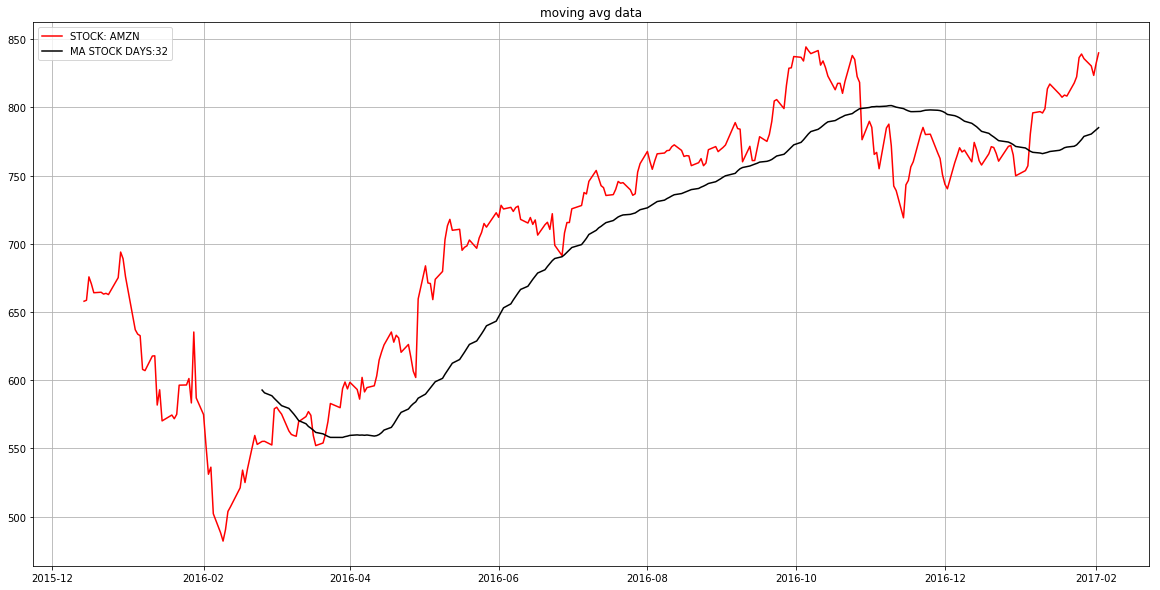

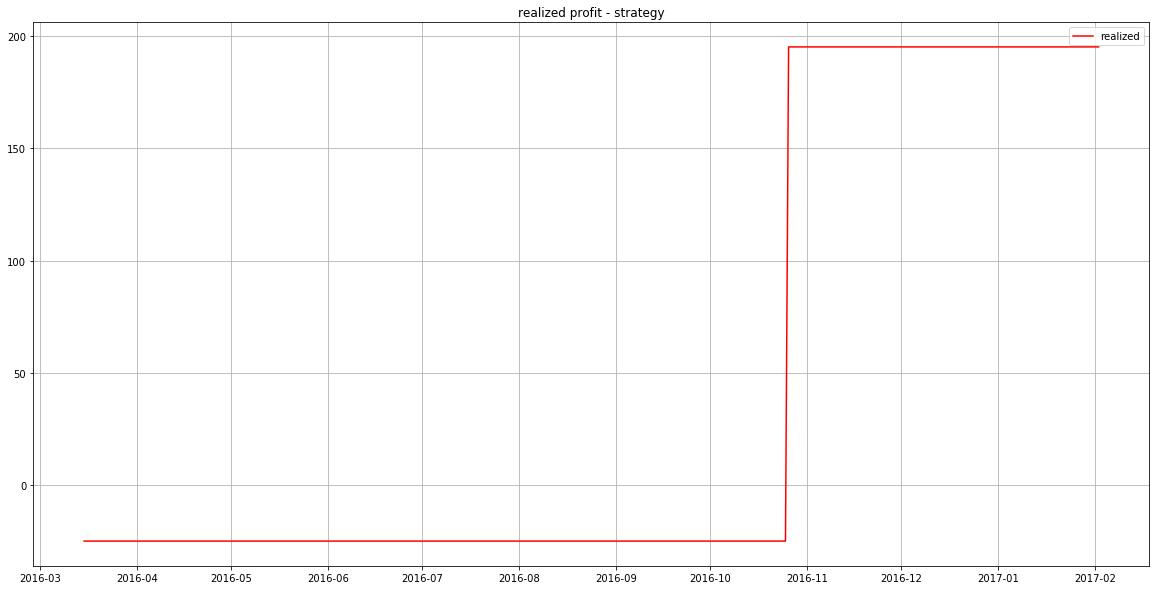

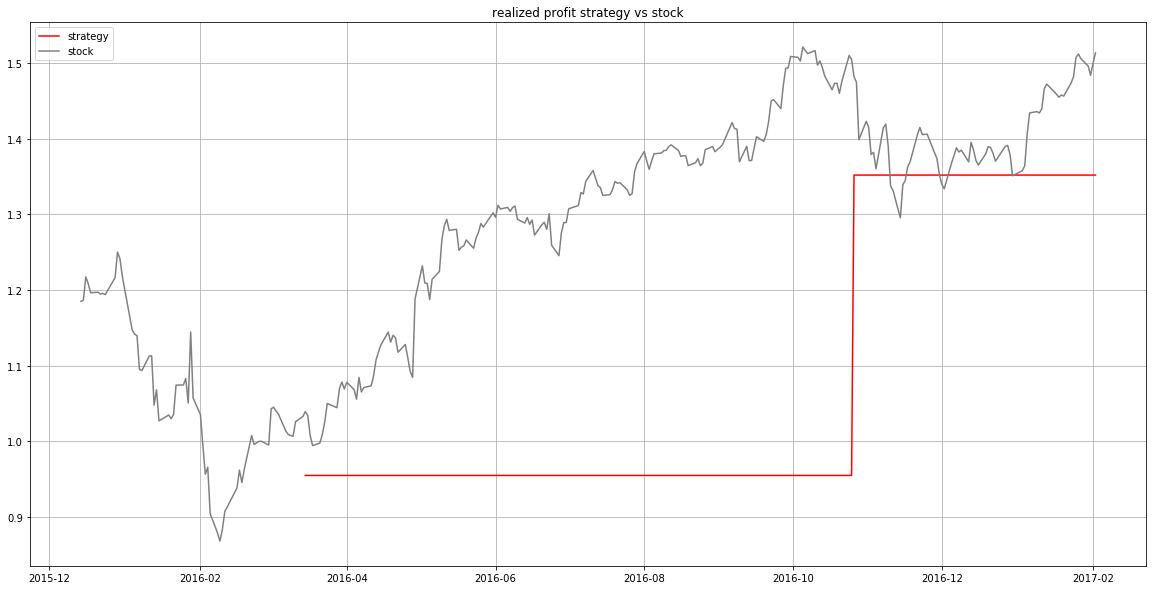

In [2]:

import pandas_datareader as pdr

from pandas_datareader import data, wb

from datetime import date

from datetime import datetime, timedelta

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('display.max_columns', 999)

pd.set_option('display.max_rows', 999)

 

def movavg(start_date, end_date, ticker1, ticker2):



    #get the data from Yahoo Finance

    #stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)

    #stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)

    dt = pd.to_datetime(start_date, format='%Y/%m/%d') - datetime.timedelta(days=50)

    #dt = pd.to_datetime(start_date, format='%Y/%m/%d') - timedelta(days=50)

    stock1 = pdr.get_data_yahoo(ticker1, dt, end_date)

    #print(dt)

    #return_stock1 = stock1.resample('D').last()

    #return_stock2 = stock2.resample('W').last()

    #print(return_stock1)

   

    data = pd.DataFrame({'s_adjclose': stock1['Adj Close']}) #, 'mkt_adjclose': stock2['Adj Close']})#, index=return_stock1.index)

    #data1= pd.DataFrame({'s_adjclose': stock1['Adj Close']})



    

    #----moving average value is 'x'---

    x=50

    print("moving average is ",x,"days")

    print("stock",s1)

   

    

    #-- trading signal section

    #data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))

    data['moving_avg'] = data['s_adjclose'].rolling(x).mean()

    data['l/s_signal']=data['s_adjclose']-data['s_adjclose'].rolling(x).mean()

    data['buy_or_sell'] = data['l/s_signal'].apply(lambda x: 'long' if x >= 0 else 'short')

    data['buy_or_sell2'] = data['l/s_signal'].shift(-1)

    data['l/s_signal2'] = data['buy_or_sell2'].apply(lambda x: 'long' if x >= 0 else 'short')

   

    data['cost'] = np.where(data['buy_or_sell']==data['l/s_signal2'], 0, data['s_adjclose'].shift(-2))

    data['cost_adj'] = np.where(data['buy_or_sell']=='short',data['cost']*-1,data['cost'])

   

    data['cash']=np.cumsum(data['cost_adj'])

     

    i = data['l/s_signal2']

    data['count'] =i.ne(i.shift(-1)).cumsum()

    data['open/close pos'] = np.where(data['count'] % 2, 'open', 'cls')

   

    #--calculate realized profit/loss per trade

    data['real_p'] = np.where((data['open/close pos'] == 'open') &(data['count'] == 1) ,0,   #when... then

                     np.where((data['open/close pos'] == 'cls')& (data['cost_adj'] > 0),data['cash'] , #when... then

                      np.where((data['open/close pos'] == 'cls') & (data['cost_adj'] ==0),data['cash'].shift(-1)

                               #np.where((data['open/close pos'] == 'open') & (data['cost_adj'] ==0),data['cash'].shift(-1)                           

                                            ,0)))   

      

    data['real_p']=data['real_p'].replace(0, np.NaN).ffill()

   

    

    

    #---compounded realized p&l

   

    #data['capital']=100000

    #data['cump&l']=100000

    #data['cump&l']= np.where(data['cost_adj']>0,100000 +data['p&l'],0)

    #data['capital']=np.where(data['count']>2,data['cump&l'].shift(1),0)

    #data['capital']=np.where(data['count']<2,100000, 100000+data[]

    #data['shares']=np.where(data['cost_adj']<0,data['capital']/data['cost'],

                           # np.where(data['count']>0),(data['capital']/data['cost'])+((data['real_p']*data['shares'].shift(1))/data['cost']),0)

    #data['shares']=data['shares'].replace(0, np.NaN).ffill()

    #data['p&l']=np.where((data['cost_adj']> 0) & (data['open/close pos']=='cls'),data['shares']*data['real_p'],0)

    #data['p&l']=data['p&l'].replace(0, np.NaN).ffill()                         

    #data['cump&l']= np.where(data['cost_adj']>0,100000 +data['p&l'],0)

    #data['cump&l']=data['cump&l'].replace(0, np.NaN).ffill() 

    
    

    

    #--BACKTEST SECTION--

      

    

     #-- normalize the stock price -----

    #y=data.shape

    #print(y)

    #t=data['s_adjclose'].iloc[x-1]

    #print(t)

 

    #starts=data['cash'].keys([np.argmax(data['cash'].values!=0, axis=1)]

       

    init_val=data['s_adjclose'][x-1]

    #print(init_val)

    data['norm_price']=data['s_adjclose']/init_val

    data['norm_price']=data['norm_price'].replace(0, np.NaN).ffill()

   

    #--normalize the real p&l to compare with the market--

    data['norm_strat']=(data['real_p']/init_val)+1

   

    
    
    

    # drop all NaN  

    #data = data.dropna()

   

    

    

    print(data)

    #print(data1)

    #export_csv = data1.to_csv (r'C:\Users\IGreenstein\Documents\financesection\movavg.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

    export_csv = data.to_csv (r'C:\Users\IGreenstein\Documents\financesection\movavg.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

   

    

    

    fig,axis = plt.subplots(1,figsize=(20,10))

    #plt.plot(data["s_adjclose"],label= 'stock 1',color='red')

    plt.plot(data['s_adjclose'],label= 'STOCK: %s'%s1,color='red')

    #plt.plot(data["norm_mkt_price"],label= 'normalized market',color='blue')

    plt.plot(data['moving_avg'],label= 'MA STOCK DAYS:%x'%x,color='black')

    plt.title('moving avg data')

    plt.legend()

    plt.grid(True)

    plt.show()

   

 

   

    fig,axis = plt.subplots(1,figsize=(20,10))

    plt.plot(data['real_p'],label= 'realized',color='red')

    plt.gca().invert_yaxis()

    plt.title('realized profit - strategy')

    plt.legend()

    plt.grid(True)

    plt.gca().invert_yaxis()

    plt.show()

 

   

    fig,axis = plt.subplots(1,figsize=(20,10))

    plt.plot(data['norm_strat'],label= 'strategy',color='red')

    plt.plot(data['norm_price'],label= 'stock',color='grey')

    plt.gca().invert_yaxis()

    plt.title('realized profit strategy vs stock')

    plt.legend()

    plt.grid(True)

    plt.gca().invert_yaxis()

    plt.show()

 

   

if __name__ == "__main__":

    #using historical data 2010-2017: the market is the S&P500 !!!

    import datetime

    s1='AMZN'

    m1='^GSPC'

    #mov=input("enter a moving average ")

    #dayz = datetime.timedelta(50)

    #print(dayz)

    start=input("enter a start date format YYYY-MM-DD  ")

    end=input("enter a end date format YYYY-MM-DD  ")

   

    movavg(start, end,s1,m1)

    #movavg('2018-01-26', '2019-09-10',s1,m1)

    #movavg('2018-01-08', '2019-09-10',s1,m1)

    #plot_data(s1) 




   


    